In [ ]:
from pathlib import Path
import importlib
import sys

import matplotlib as mpl

# Ensure local src/ is importable when run from the notebook
THIS_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
SRC_DIR = THIS_DIR if (THIS_DIR / 'figure_two_llm.py').exists() else THIS_DIR / 'src'
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

import figure_two_llm
importlib.reload(figure_two_llm)
from figure_two_llm import (
    load_llm_tables,
    load_regression,
    plot_combined_figure,
    save_figure,
)

mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['axes.titleweight'] = 'bold'

DATA_ROOT = Path('..')
FIG_OUT_DIR = Path('../outputs/figures')

coef_df, var_order = load_regression(DATA_ROOT)
llm_overall, llm_by_panel = load_llm_tables(DATA_ROOT / 'data')
mpl.rcParams['axes.unicode_minus'] = False

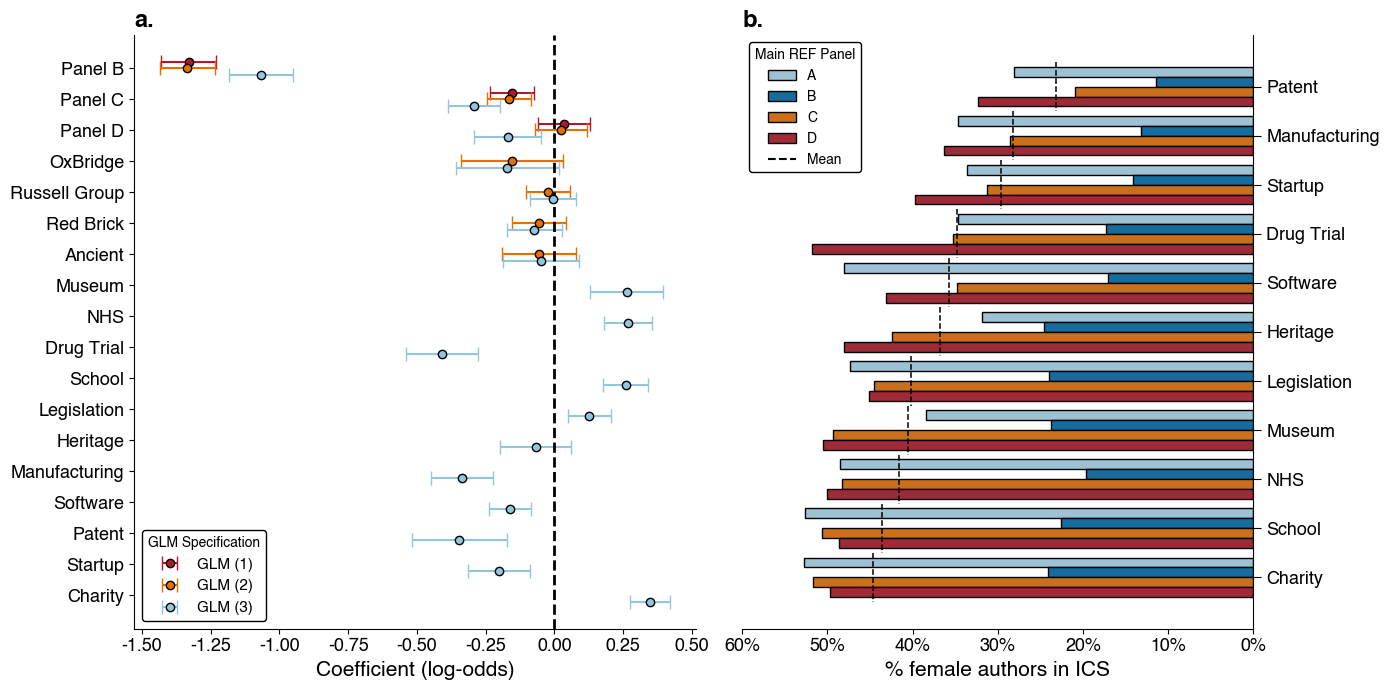

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, (ax_glm, ax_panel) = plot_combined_figure(coef_df, var_order, llm_by_panel)
save_figure(fig, FIG_OUT_DIR, basename='figure_two')
display(fig)
plt.close(fig)
